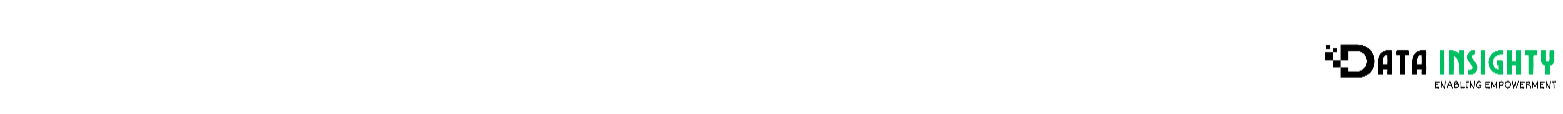

# What is Polinomial Regression

Polynomial Regression is a regression algorithm that models the relationship between a dependent(y) and independent variable(x) as nth degree polynomial. The Polynomial Regression equation is given below:

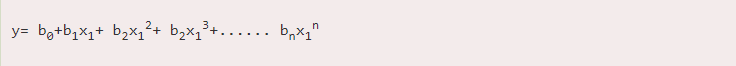

The dataset used in Polynomial regression for training is of non-linear nature.

It makes use of a linear regression model to fit the complicated and non-linear functions and datasets.

"In Polynomial regression, the original features are converted into Polynomial features of required degree (2,3,..,n) and then modeled using a linear model."

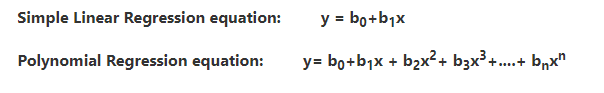

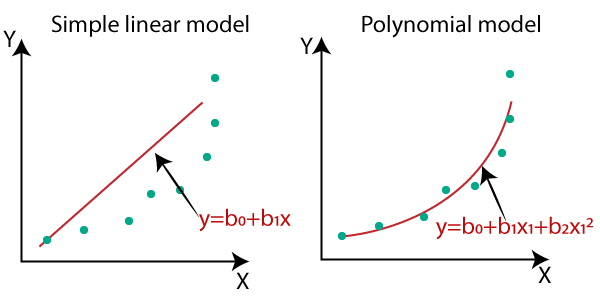

# Polinomial Regression with Position-Salaries dataset

In this Regression example we will consider sales based on "Position salries dataset".

In this notebook, we are going to build a Polinomial regression model to predict 'Salary' using ' Level of Position' as the independent variable.

This tutorial covers the following steps:

1. Importing libraries and loading data
2. Understanding the structure of the data
3. Training Simple Linear Regression for entire data
4. Training Polinomial Regression for entire data
4. Predicion using simple Linear Regression and Polinomial Regression

# 1. Importing Librries and Loading data

Pandas is a powerful data manipulation and analysis library, providing data structures and functions to work with structured data.

NumPy is a fundamental package for scientific computing in Python. It provides support for multidimensional arrays and various mathematical functions to operate on these arrays.

Seaborn is a statistical data visualization library built on top of matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. pyplot is a module within Matplotlib that provides a MATLAB-like interface for plotting.

In [1]:
# Importing necessary libraries
import pandas as pd    # For data manipulation and analysis
import numpy as np     # For numerical computing
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots

Data set:https://www.kaggle.com/datasets/akram24/position-salaries/code downloded and saved in Local machine

In [2]:
# Reading csv file from local folder
df = pd.read_csv("Position_Salaries.csv")

# 2. Understanding the Data

Now, let's check the structure of the TV marketing dataset.

In [3]:
# Let's check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [4]:
# Identify variable types
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['Level', 'Salary'], dtype='object')
Categorical columns: Index(['Position'], dtype='object')



Frequency distribution for Position
Position
Business Analyst     1
Junior Consultant    1
Senior Consultant    1
Manager              1
Country Manager      1
Region Manager       1
Partner              1
Senior Partner       1
C-level              1
CEO                  1
Name: count, dtype: int64

Distribution for Level


c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


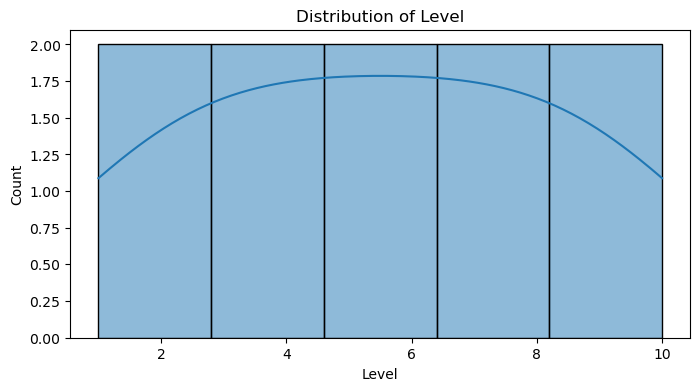

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Distribution for Salary


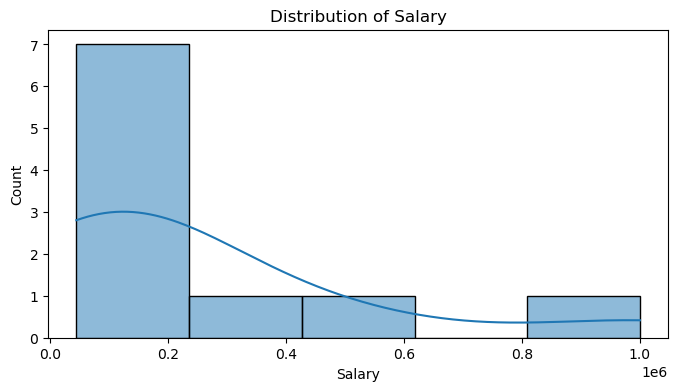

In [5]:
# Create frequency distributions
for col in categorical_cols:
    print("\nFrequency distribution for", col)
    print(df[col].value_counts())

for col in numerical_cols:
    print("\nDistribution for", col)
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title("Distribution of " + col)
    plt.show()

In [6]:
# Drop categorical columns
df = df.drop(categorical_cols, axis=1)


# Displaying the DataFrame after dropping column 'Unnamed: 0'
print("\nDataFrame after categorical columns :")
print(df)


DataFrame after categorical columns :
   Level   Salary
0      1    45000
1      2    50000
2      3    60000
3      4    80000
4      5   110000
5      6   150000
6      7   200000
7      8   300000
8      9   500000
9     10  1000000


In [7]:
# Display the first 5 rows
df.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [8]:
# Display the last 5 rows
df.tail()

,Level,Salary
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [9]:
# Check the shape of the DataFrame (rows, columns)
df.shape

(10, 2)

In [10]:
# Let's look at some statistical information about the dataframe.
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


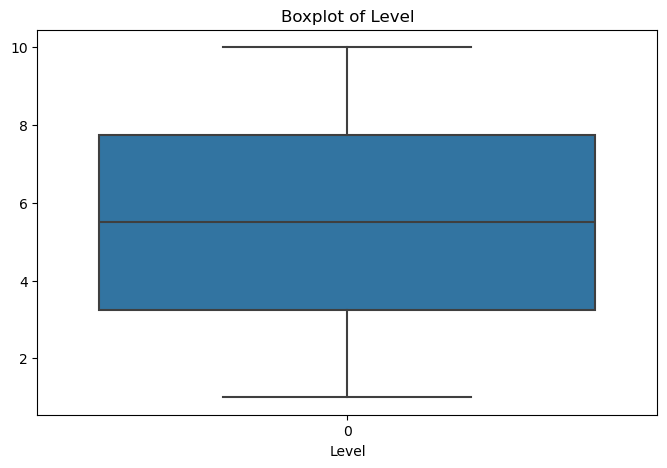

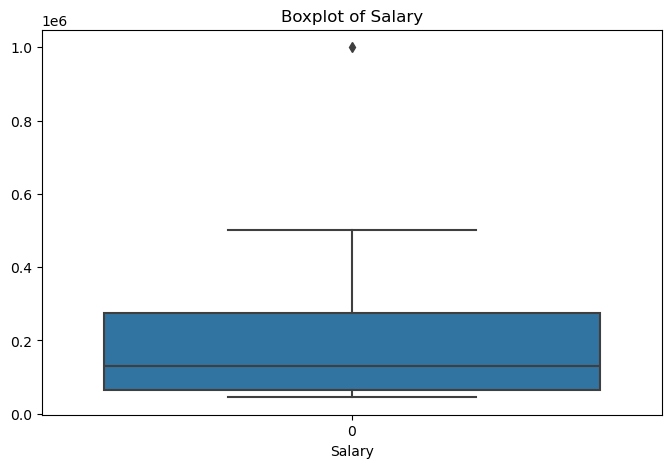

In [11]:
# Create separate boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df[col])
    plt.title("Boxplot of " + col)
    plt.xlabel(col)
    plt.show()

<Axes: >

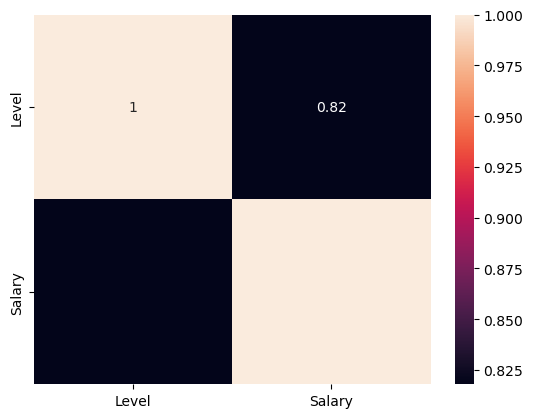

In [12]:
# Creating a heatmap of the correlation matrix for the DataFrame df
# The correlation matrix represents the correlation coefficients between different columns
# df.corr() calculates the correlation matrix for all numerical columns in the DataFrame df
# annot=True specifies that the correlation coefficients should be annotated onto the heatmap
sns.heatmap(df.corr(), annot=True)

# 3. Perfroming Polinomial Regression

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Visualising the Linear Regression results

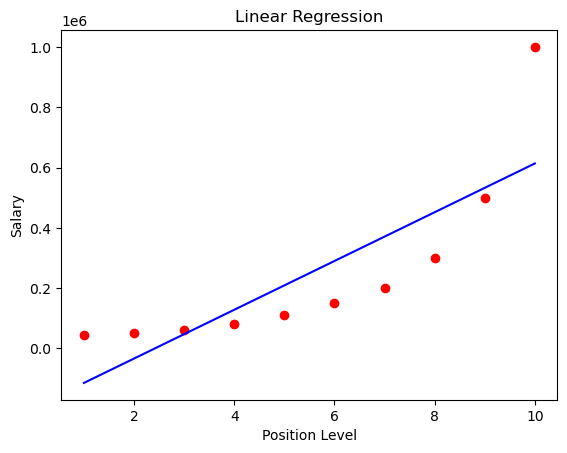

In [15]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Training the Polynomial Regression model on the whole dataset

### degree = 2 

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

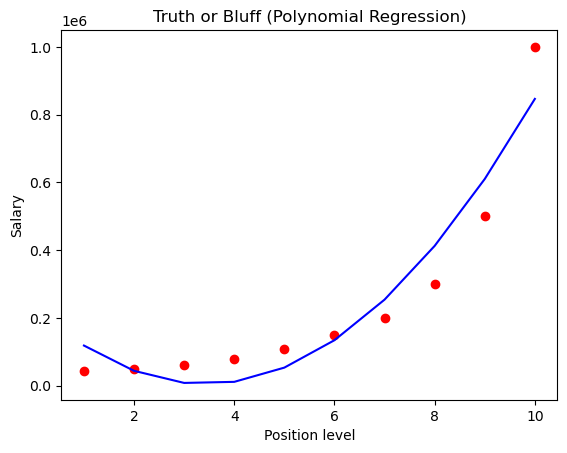

In [17]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

### degree = 3

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly, y)

LinearRegression()

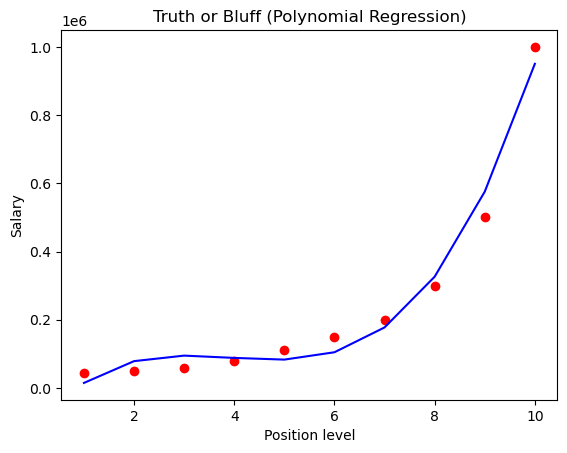

In [19]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_3.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### degree = 4

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly, y)

LinearRegression()

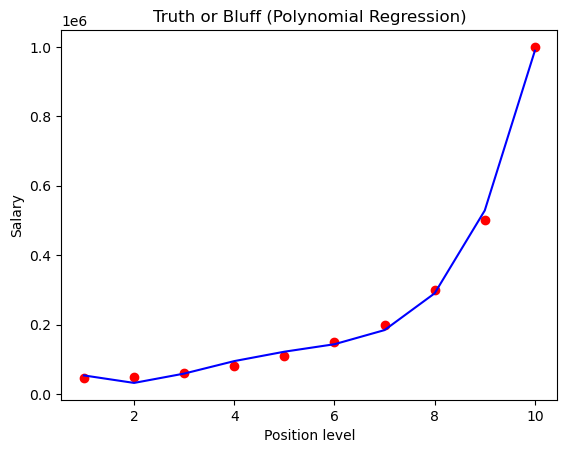

In [21]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_4.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Model Evaluation

# Predicting a new result with Linear Regression

In [22]:
lin_reg.predict([[6.5]])

array([330378.78787879])

In [23]:
lin_reg.predict([[12]])

array([775212.12121212])

# Predicting a new result with Polynomial Regression

In [24]:
lin_reg_4.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265157])

In [25]:
lin_reg_4.predict(poly_reg.fit_transform([[12]]))

array([3035984.84848502])

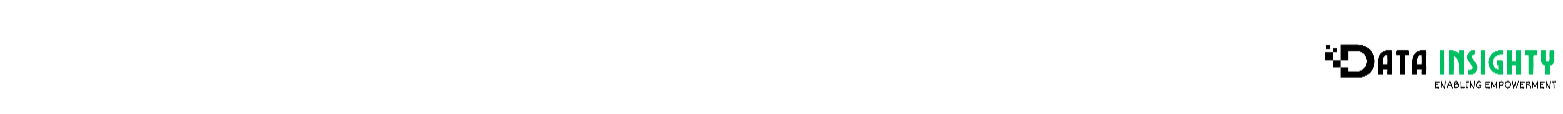